# Aula 4 - _Input_ e _output_

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, MetaData, Table, inspect
np.random.seed(123)

## 1 Lendo dados de um _json_

### 1.1 Recuperando NOMES e juntando _DataFrames_ com `concat()`

In [2]:
# nomes de meninas
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
print(nomes_f.shape)
nomes_f.head()

(200, 5)


,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [3]:
# nomes de meninos
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
print(nomes_m.shape)
nomes_m.head()

(200, 5)


,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [4]:
# juntando os dois dfs
nomes = pd.concat([nomes_f, nomes_m])
nomes.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [5]:
nomes.tail()

,nome,regiao,freq,rank,sexo
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M
199,GEOVANE,0,65435,200,M


In [6]:
# conta a frequencia de ocorrencia dos indices no df juntado, se for maior que 1 siginifica que os indices estão repetindo
nomes.index.value_counts().max()

2

In [7]:
# reseta indices para que cada um seja único
nomes = pd.concat([nomes_f, nomes_m]).reset_index(drop=True)

In [8]:
# máximo de vezes que um índice aparece
nomes.index.value_counts().max()

1

In [9]:
# junta apenas os nomes dos dois dfs em outro df, sem resetar índices
alunos = pd.concat([nomes_f, nomes_m])['nome'].to_frame()
print(alunos.shape)
alunos.sample(5)

(400, 1)


,nome
34,SEBASTIAO
42,MARLENE
103,MAICON
155,CECILIA
142,HUGO


### 1.2 Incluindo outras infos dos alunos

In [10]:
# número total de alunos
total_alunos = nomes.shape[0]
total_alunos

400

In [11]:
# gera números de mátricula: (um número de 0 a 399) * ( 1, 3 ou 5) + 100000
alunos['matricula'] = (np.random.permutation(total_alunos) * np.random.choice([1, 3, 5])) + 100000
alunos.head()

,nome,matricula
0,MARIA,100188
1,ANA,100057
2,FRANCISCA,100203
3,ANTONIA,100382
4,ADRIANA,100230


In [12]:
# domínios de email que os alunos podem ter
dominios = ['@correioquente.com', '@iarru.com.br', '@fmail.com']

In [13]:
# cria email para alunos
alunos['email'] = alunos.nome.str.lower() + np.random.choice(dominios)
alunos.head()

,nome,matricula,email
0,MARIA,100188,maria@correioquente.com
1,ANA,100057,ana@correioquente.com
2,FRANCISCA,100203,francisca@correioquente.com
3,ANTONIA,100382,antonia@correioquente.com
4,ADRIANA,100230,adriana@correioquente.com


## 2 Lendo dados de um HTML

### 2.1 Recuperando CURSOS

In [14]:
cursos = pd.read_html('http://tabela-cursos.herokuapp.com/index.html')
type(cursos)

list

In [15]:
len(cursos)

1

In [16]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [17]:
cursos = cursos[0]
cursos.rename(columns={'Nome do curso': 'nome_curso'}, inplace=True)
cursos.head()

,nome_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [18]:
cursos['codigo'] = cursos.index + 1
cursos.head()

,nome_curso,codigo
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [19]:
cursos.set_index('codigo', inplace=True)
cursos.head()

,nome_curso
codigo,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


### 2.2 Matriculando alunos em cursos

In [20]:
# define quantidade de cursos que cada aluno frequenta
alunos['cursos_matriculados'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
alunos.cursos_matriculados.value_counts()

1     178
2     107
3      56
4      32
5      13
7       6
6       4
8       2
10      1
9       1
Name: cursos_matriculados, dtype: int64

In [21]:
alunos.cursos_matriculados.describe()

count    400.000000
mean       2.135000
std        1.477237
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: cursos_matriculados, dtype: float64

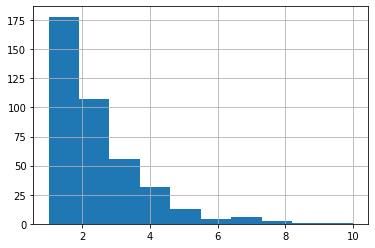

In [22]:
ax = alunos.cursos_matriculados.hist()

In [23]:
# define "probabilidade" dos cursos serem escolhidos
x = np.random.rand(20)
prob = x / sum(x)
prob

array([0.09653253, 0.03589007, 0.02705752, 0.05389099, 0.03056926,
       0.08023678, 0.08945247, 0.06851836, 0.07211682, 0.04016315,
       0.00681913, 0.08206472, 0.05303992, 0.06049733, 0.0638625 ,
       0.05483567, 0.00095024, 0.02154725, 0.01929288, 0.0426624 ])

In [24]:
# itera sobre o df de alunos e os matricula na quantidade de cursos de cada um
matriculas_do_aluno = []
for index, row in alunos.iterrows():
    for _ in range(row.cursos_matriculados):
        matriculas_do_aluno.append([row.matricula, np.random.choice(cursos.index, p=prob)])

matriculas = pd.DataFrame(data=matriculas_do_aluno, columns=['matricula_aluno', 'codigo_curso'])
matriculas.head()

,matricula_aluno,codigo_curso
0,100188,13
1,100188,15
2,100057,16
3,100057,8
4,100203,8


In [25]:
len(matriculas_do_aluno)

854

In [26]:
matriculas.shape[0]

854

In [27]:
alunos.cursos_matriculados.sum()

854

In [28]:
# conta alunos matriculados por curso
qtd_alunos_curso = matriculas.groupby(by='codigo_curso').count().join(cursos.nome_curso).sort_values(by='matricula_aluno', ascending=False).rename(columns={'matricula_aluno': 'qtd_alunos'})
qtd_alunos_curso.head()

,qtd_alunos,nome_curso
codigo_curso,,
6,77,PHP com MySql
1,75,Lógica de programação
7,73,.NET para web
8,62,Novas integrações com Java
12,61,Hardware básico


## 3 Exportando dados

In [29]:
# exporta df para arquivo CSV
qtd_alunos_curso.to_csv('dados/aula4_qtd_alunos_por_curso.csv', index=False)

In [30]:
# recupera dados do arquivo recém exportado
pd.read_csv('dados/aula4_qtd_alunos_por_curso.csv').head()

,qtd_alunos,nome_curso
0,77,PHP com MySql
1,75,Lógica de programação
2,73,.NET para web
3,62,Novas integrações com Java
4,61,Hardware básico


## 4 Acessando banco SQL

### 4.1 Escrevendo no banco

In [31]:
# cria a engine (motor) do banco informando o tipo do banco e que deve ser salvo na memória local
engine = create_engine('sqlite:///:memory:') # ver como faz para criar um arquivo
engine

Engine(sqlite:///:memory:)

In [32]:
type(engine)

sqlalchemy.engine.base.Engine

In [33]:
# passa df para formato de banco com to_sql() e armazena seu conteúdo na tabela tb_qtd_matriculas, usando a engine
qtd_alunos_curso.to_sql(name='tb_qtd_matriculas', con=engine)

In [34]:
# instancia objeto Inspector para poder inspecionar o banco
inspector = inspect(engine)
inspector

In [35]:
# verifica as tabelas que existem no banco
inspector.get_table_names()

['tb_qtd_matriculas']

In [36]:
qtd_alunos_curso.to_sql('tb_qtd_matriculas_2', engine)
inspector.get_table_names()

['tb_qtd_matriculas']

In [37]:
# o inspector precisa ser instanciado sempre que houver "mudança" no banco???
inspect(engine).get_table_names()

['tb_qtd_matriculas', 'tb_qtd_matriculas_2']

### 4.2 Lendo do banco

In [38]:
# recupera dados do banco (para um df) através de uma query
query = "select * from tb_qtd_matriculas where qtd_alunos < 20"
pd.read_sql(query, engine)

,codigo_curso,qtd_alunos,nome_curso
0,18,17,Programação funcional
1,19,14,Boas práticas em Java
2,11,5,Preparatório para certificação Java
3,17,1,Internet das coisas


In [39]:
# recupera a tabela toda
pd.read_sql_table('tb_qtd_matriculas', engine).head()

,codigo_curso,qtd_alunos,nome_curso
0,6,77,PHP com MySql
1,1,75,Lógica de programação
2,7,73,.NET para web
3,8,62,Novas integrações com Java
4,12,61,Hardware básico


In [40]:
# recupera a tabela toda, definindo os campos e sua ordem
pd.read_sql_table('tb_qtd_matriculas', engine, columns=['nome_curso', 'qtd_alunos']).head()

,nome_curso,qtd_alunos
0,PHP com MySql,77
1,Lógica de programação,75
2,.NET para web,73
3,Novas integrações com Java,62
4,Hardware básico,61


## 5 Planilhas de Excel

### 5.1 Juntando _DataFrames_ com `join()`

In [41]:
qtd_alunos_curso.index

Int64Index([6, 1, 7, 8, 12, 9, 14, 16, 15, 4, 13, 20, 2, 5, 10, 3, 18, 19, 11,
            17],
           dtype='int64', name='codigo_curso')

In [42]:
matriculas.head()

,matricula_aluno,codigo_curso
0,100188,13
1,100188,15
2,100057,16
3,100057,8
4,100203,8


In [43]:
# escolho um curso qualquer
cod_curso = np.random.choice(qtd_alunos_curso.index)
cod_curso

2

In [44]:
qtd_alunos_curso.iloc[cod_curso]

qtd_alunos               73
nome_curso    .NET para web
Name: 7, dtype: object

In [45]:
# seleciono apenas matriculas de alunos que vao frequentar essa aula
turma_selecionada = matriculas.query(f"codigo_curso == {cod_curso}").set_index('matricula_aluno')
turma_selecionada.head()

,codigo_curso
matricula_aluno,
100106,2
100186,2
100229,2
100164,2
100232,2


In [46]:
# junta df com nomes dos alunos
turma_selecionada = turma_selecionada.join(alunos.set_index('matricula'))
turma_selecionada.head()

,codigo_curso,nome,email,cursos_matriculados
100020,2,JULIO,julio@correioquente.com,7
100043,2,ANGELICA,angelica@correioquente.com,2
100070,2,BARBARA,barbara@correioquente.com,1
100085,2,JENIFER,jenifer@correioquente.com,2
100106,2,BIANCA,bianca@correioquente.com,4


In [47]:
# seleciona apenas nome do aluno
turma_selecionada = turma_selecionada['nome']
turma_selecionada

100020        JULIO
100043     ANGELICA
100070      BARBARA
100085      JENIFER
100106       BIANCA
100119     LUCILENE
100156         LARA
100156         LARA
100156         LARA
100160      DOUGLAS
100164     CAROLINA
100169        JORGE
100186       FLAVIA
100205        JAIRO
100207    CLAUDINEI
100229      JANAINA
100232        TANIA
100238      CHARLES
100241       LURDES
100292        ARTUR
100297    VANDERLEI
100324        CELSO
100324        CELSO
100328       PAMELA
100332      EDVALDO
100341         JEAN
100349       FLAVIO
100350     REINALDO
100356      LUCIANE
100375       RUBENS
100386      GEOVANE
100387      RODRIGO
Name: nome, dtype: object

In [48]:
# renomeia coluna para indicar que são alunos de um curso específico
turma_selecionada = turma_selecionada.to_frame().rename(columns={'nome': qtd_alunos_curso.iloc[cod_curso].nome_curso})
turma_selecionada.head()

,.NET para web
100020,JULIO
100043,ANGELICA
100070,BARBARA
100085,JENIFER
100106,BIANCA


### 5.2 Exportando para arquivo `xlsx`

In [49]:
turma_selecionada.to_excel('dados/aula4_turma_selecionada.xlsx', index=False)

In [50]:
pd.read_excel('dados/aula4_turma_selecionada.xlsx').head()

,.NET para web
0,JULIO
1,ANGELICA
2,BARBARA
3,JENIFER
4,BIANCA
